In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn


In [3]:
league = pd.read_csv(r".\Master_Ranked_Games.csv")


In [4]:
league

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4227123625,1429,0,1,1,0,0,0,0,0,...,45,53831,41991,609,64,12.8,127,4,12916,26338
1,4219545724,1313,0,0,1,0,0,0,0,0,...,43,52924,39672,510,63,12.6,133,4,12252,29828
2,4219463634,1660,1,0,0,1,1,1,1,1,...,22,61745,46516,630,65,13.0,153,2,17005,37066
3,4205778093,984,1,1,1,0,1,0,2,0,...,5,25007,21444,304,41,8.2,51,1,10499,3085
4,4201063474,1437,0,1,1,0,1,0,2,0,...,39,71794,45798,565,68,13.6,150,7,47523,47150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107120,4216107910,2479,1,1,0,0,0,0,3,1,...,41,149798,72167,789,86,17.2,258,6,34890,62124
107121,4031558534,932,0,0,0,0,0,0,0,0,...,26,37534,32931,364,51,10.2,110,5,11983,31400
107122,3882136458,2081,0,1,1,0,0,0,1,0,...,68,97369,71576,797,85,17.0,222,8,33499,79612
107123,4137464714,1619,0,0,0,0,0,0,1,0,...,68,116262,59001,524,72,14.4,162,11,52292,60903


In [5]:
league.head()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4227123625,1429,0,1,1,0,0,0,0,0,...,45,53831,41991,609,64,12.8,127,4,12916,26338
1,4219545724,1313,0,0,1,0,0,0,0,0,...,43,52924,39672,510,63,12.6,133,4,12252,29828
2,4219463634,1660,1,0,0,1,1,1,1,1,...,22,61745,46516,630,65,13.0,153,2,17005,37066
3,4205778093,984,1,1,1,0,1,0,2,0,...,5,25007,21444,304,41,8.2,51,1,10499,3085
4,4201063474,1437,0,1,1,0,1,0,2,0,...,39,71794,45798,565,68,13.6,150,7,47523,47150


In [6]:
league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107125 entries, 0 to 107124
Data columns (total 50 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gameId                   107125 non-null  int64  
 1   gameDuraton              107125 non-null  int64  
 2   blueWins                 107125 non-null  int64  
 3   blueFirstBlood           107125 non-null  int64  
 4   blueFirstTower           107125 non-null  int64  
 5   blueFirstBaron           107125 non-null  int64  
 6   blueFirstDragon          107125 non-null  int64  
 7   blueFirstInhibitor       107125 non-null  int64  
 8   blueDragonKills          107125 non-null  int64  
 9   blueBaronKills           107125 non-null  int64  
 10  blueTowerKills           107125 non-null  int64  
 11  blueInhibitorKills       107125 non-null  int64  
 12  blueWardPlaced           107125 non-null  int64  
 13  blueWardkills            107125 non-null  int64  
 14  blue

In [7]:
league.describe()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
count,1.071250e+05,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,...,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000
mean,4.159074e+09,1432.977914,0.495132,0.507025,0.513410,0.236229,0.408047,0.387715,1.359356,0.297018,...,39.807365,68789.821620,47875.980285,501.132966,64.695561,12.939112,125.359683,5.688831,24547.786763,36884.671888
std,1.029108e+08,436.506952,0.499979,0.499953,0.499822,0.424766,0.491474,0.487231,1.256974,0.535069,...,28.805782,37648.964189,16455.077811,180.010409,15.166821,3.033364,66.746287,3.640699,15510.255865,27034.549770
min,3.163679e+09,190.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.129344e+09,1121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.000000,40494.000000,36127.000000,382.000000,55.000000,11.000000,84.000000,3.000000,13297.000000,12583.000000
50%,4.189629e+09,1420.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,35.000000,63885.000000,47955.000000,517.000000,66.000000,13.200000,128.000000,5.000000,21455.000000,32486.000000
75%,4.222893e+09,1735.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,...,53.000000,90554.000000,59133.000000,627.000000,75.000000,15.000000,171.000000,8.000000,32367.000000,57346.000000
max,4.257322e+09,3758.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,4.000000,...,225.000000,341957.000000,141692.000000,1338.000000,145.000000,29.000000,488.000000,29.000000,188817.000000,191193.000000


In [8]:
league.columns

Index(['gameId', 'gameDuraton', 'blueWins', 'blueFirstBlood', 'blueFirstTower',
       'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt', 'redWins', 'redFirstBlood', 'redFirstTower',
       'redFirstBaron', 'redFirstDragon', 'redFirstInhibitor',
       'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills',
       'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist',
       'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills',
       'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills',
       'redKillingSpree', 'redTotalHeal', 'redObjectDamageDealt'],
    

In [9]:
league[['gameId']].value_counts()

gameId    
4142935447    2
4192755446    2
4149247049    2
4142964684    2
4118306793    2
             ..
4154470239    1
4154470206    1
4154469507    1
4154469384    1
4257321770    1
Name: count, Length: 107112, dtype: int64

In [10]:
league.corr()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
gameId,1.000000,0.001328,-0.009713,-0.004008,-0.004157,-0.018107,-0.007425,-0.009885,0.028318,-0.019654,...,0.001655,-0.004663,-0.023067,-0.009834,0.004138,0.004138,0.012887,-0.026526,0.020292,0.004728
gameDuraton,0.001328,1.000000,-0.020653,0.001113,0.046164,0.402575,0.091122,0.156593,0.494489,0.497172,...,0.366323,0.693182,0.772841,0.900673,0.755967,0.755967,0.785703,0.376685,0.718363,0.627111
blueWins,-0.009713,-0.020653,1.000000,0.208979,0.472211,0.369585,0.276402,0.668425,0.455406,0.355497,...,-0.332346,-0.173848,-0.275944,-0.109334,-0.221730,-0.221730,-0.247116,-0.397022,-0.220708,-0.557780
blueFirstBlood,-0.004008,0.001113,0.208979,1.000000,0.220634,0.050738,0.142845,0.157705,0.136477,0.043951,...,-0.086768,-0.041774,-0.077770,-0.034696,-0.051810,-0.051810,-0.056249,-0.126558,-0.035060,-0.143356
blueFirstTower,-0.004157,0.046164,0.472211,0.220634,1.000000,0.145523,0.224847,0.397007,0.298754,0.124413,...,-0.138609,-0.071147,-0.127329,-0.026023,-0.068079,-0.068079,-0.124301,-0.227451,-0.053142,-0.324156
blueFirstBaron,-0.018107,0.402575,0.369585,0.050738,0.145523,1.000000,0.132850,0.410164,0.441767,0.886130,...,-0.038391,0.177221,0.185923,0.387670,0.191596,0.191596,0.250734,-0.028374,0.178618,-0.003921
blueFirstDragon,-0.007425,0.091122,0.276402,0.142845,0.224847,0.132850,1.000000,0.186230,0.586899,0.123915,...,-0.218051,-0.098456,-0.099508,0.110429,-0.091008,-0.091008,0.054614,-0.214715,-0.055602,-0.141318
blueFirstInhibitor,-0.009885,0.156593,0.668425,0.157705,0.397007,0.410164,0.186230,1.000000,0.405637,0.385164,...,-0.106175,0.039364,-0.021738,0.046620,0.021621,0.021621,-0.118942,-0.169300,-0.019547,-0.341737
blueDragonKills,0.028318,0.494489,0.455406,0.136477,0.298754,0.441767,0.586899,0.405637,1.000000,0.474558,...,-0.140576,0.154372,0.173743,0.476847,0.175815,0.175815,0.324852,-0.139044,0.193757,-0.009354
blueBaronKills,-0.019654,0.497172,0.355497,0.043951,0.124413,0.886130,0.123915,0.385164,0.474558,1.000000,...,0.018866,0.270038,0.275772,0.460760,0.263059,0.263059,0.327136,0.027721,0.270974,0.077367


<Axes: >

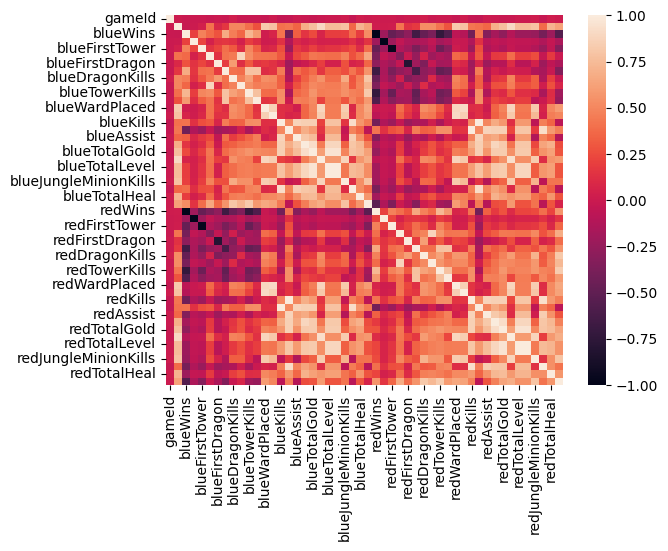

In [11]:
corelation_matrix = league.corr()
corelation_matrix

sn.heatmap(corelation_matrix)

In [12]:
league['win'] = league['blueWins']
league = league.drop(columns=['blueWins', 'redWins'])

In [13]:
y = league['win']


In [14]:
X = league.drop(columns=['win'])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (74987, 48)
X_test shape: (32138, 48)
y_train shape: (74987,)
y_test shape: (32138,)


In [17]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [18]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", metrics.f1_score(y_test, y_pred, average='weighted'))


Accuracy: 0.9757296658161678
Precision: 0.9757296658161678
Recall: 0.9757296658161678
F1 Score: 0.9757296658161678


In [19]:
print("prediction value : " , y_pred)
print("truth : " , y_test)

prediction value :  [1 0 0 ... 0 0 1]
truth :  26785    1
10501    0
43960    0
16349    0
11256    0
        ..
1958     1
52439    1
29035    0
79223    0
48011    1
Name: win, Length: 32138, dtype: int64


In [20]:

y_pred_flat = y_pred.flatten() if isinstance(y_pred, np.ndarray) else y_pred.to_numpy().flatten()
y_test_flat = y_test.flatten() if isinstance(y_test, np.ndarray) else y_test.to_numpy().flatten()

dff = pd.DataFrame(data = {

    'actual value': y_test_flat,
    'predicted value': y_pred_flat
    
})

In [21]:
dff.head(15)

,actual value,predicted value
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,0,0


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     16300
           1       0.98      0.98      0.98     15838

    accuracy                           0.98     32138
   macro avg       0.98      0.98      0.98     32138
weighted avg       0.98      0.98      0.98     32138



## Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [24]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
decision_tree_predictions = decision_tree_model.predict(X_test)

In [26]:
decision_tree_model.score(X_test, y_test)

0.9761964030120107

## Decision Tree Visualization 

In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

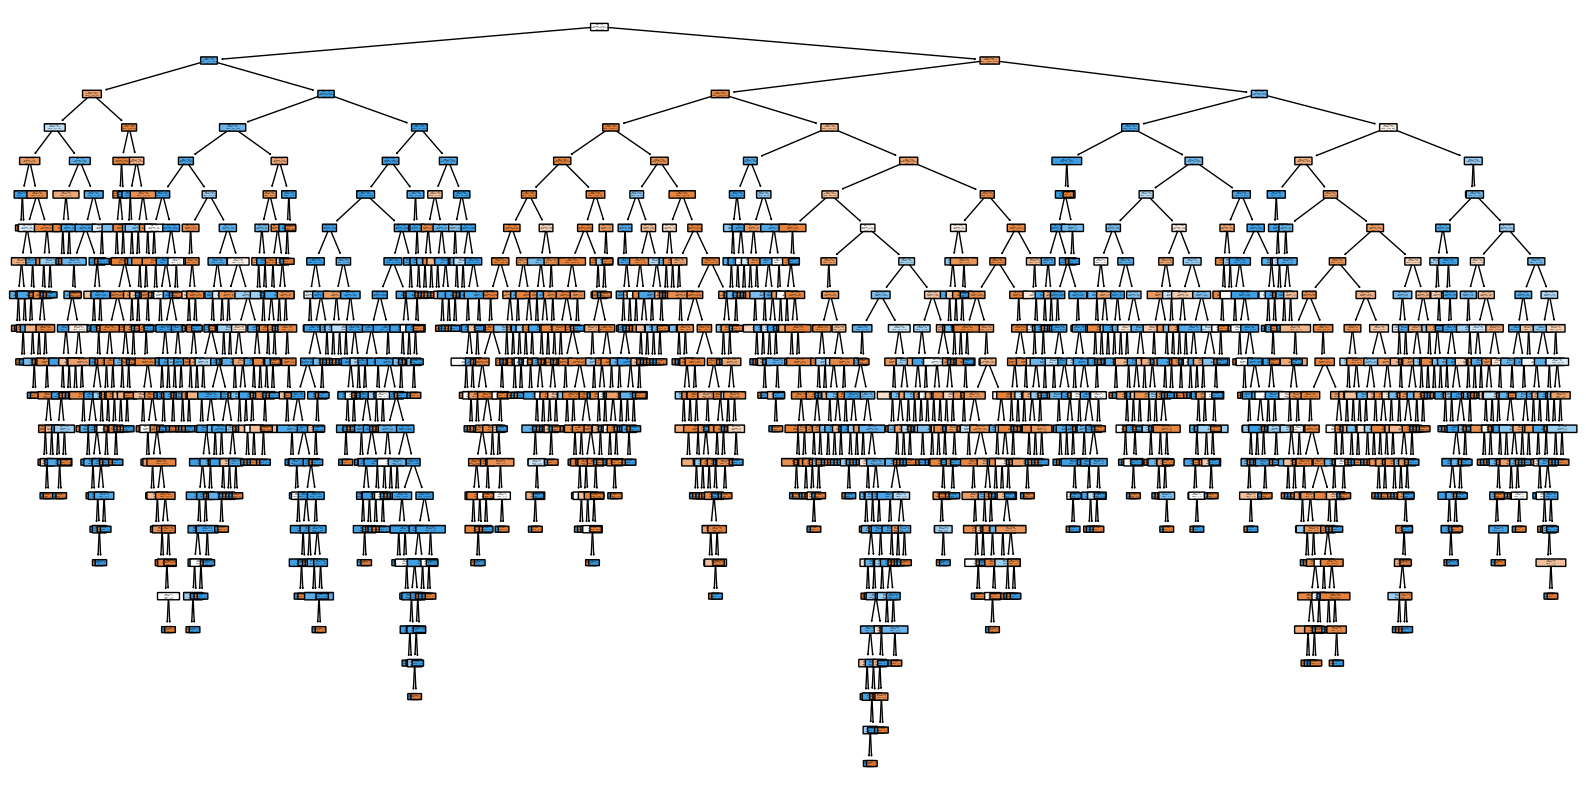

In [29]:
plt.figure(figsize=(20, 10)) 
plot_tree(decision_tree_model, filled=True, feature_names=X_train.columns, class_names=True, rounded=True)
plt.show()